
# Análise de dados de Compras de um Ecommerce  

Fonte dos dados: São artificiais <br>
Problema: Responder diversas perguntas sobre compras dos clientes.

In [2]:
# Imports
from pandas import read_csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = read_csv('dados/Ecommerce Purchases.csv'); data.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


**Total de linhas e colunas**

In [4]:
data.shape

(10000, 14)

**Todas as colunas**

In [5]:
data.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

**Mais informações**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


**1. Qual é o preço de compra médio?**

In [7]:
data['Purchase Price'].mean()

50.34730200000025

**2. Quais foram os preços de compra mais altos e mais baixos?**

In [8]:
data['Purchase Price'].max()

99.99

In [9]:
data['Purchase Price'].min()

0.0

**3. Quantas pessoas têm Português 'pt' como sua língua de escolha no site?**

In [42]:
len(data[data['Language']=='pt'])

1118

**4. Quantas pessoas têm o cargo de "Engenheiro Elétrico"?**

In [44]:
data['Job']
len(data[data['Job'] == 'Energy engineer'])

16

**5. Quantas pessoas fizeram a compra durante a AM e quantas pessoas fizeram a compra durante o PM?**

In [17]:
# Abordagem função value_counts (Mais específica)
data['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [19]:
# Abordagem groupby (Mais flexível)
periodo = data.groupby(['AM or PM']).size(); periodo

AM or PM
AM    4932
PM    5068
dtype: int64

<AxesSubplot:ylabel='None'>

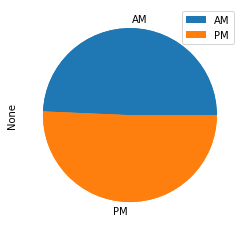

In [20]:
plt.pie(periodo)
periodo.plot.pie(legend=True)

**6. Quais são os 5 títulos de trabalho mais comuns?**

In [28]:
work = data.groupby(['Job']).size().head(5); work

Job
Academic librarian                  11
Accommodation manager               17
Accountant, chartered               20
Accountant, chartered certified     18
Accountant, chartered management    15
dtype: int64

In [29]:
work = data['Job'].value_counts(); work

Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Research officer, political party    27
Purchasing manager                   27
                                     ..
Prison officer                        7
Actuary                               6
Editor, film/video                    6
Information systems manager           5
Investment analyst                    5
Name: Job, Length: 623, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Job'>

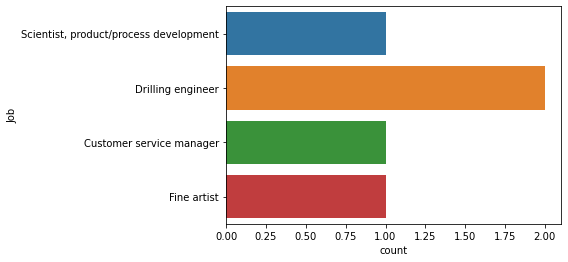

In [27]:
sns.countplot(y='Job', data=data.head(5))

**7. Alguém fez uma compra que veio do Lot: "90 WT", qual foi o preço de compra para esta transação?**

In [66]:
data[data['Lot']=='90 WT']['Purchase Price']

513    75.1
Name: Purchase Price, dtype: float64

**8. Qual é o email da pessoa com o seguinte número do cartão de crédito: 4926535242672853**

In [68]:
data[data["Credit Card"] == 4926535242672853]['Email'] 

1234    bondellen@williams-garza.com
Name: Email, dtype: object

**9. Quantas pessoas têm o American Express como seu fornecedor de cartão de crédito * e * fizeram uma compra acima de US $ 95?**

In [32]:
data[(data['CC Provider']=='American Express') & (data['Purchase Price']>95)].count()

Address             39
Lot                 39
AM or PM            39
Browser Info        39
Company             39
Credit Card         39
CC Exp Date         39
CC Security Code    39
CC Provider         39
Email               39
Job                 39
IP Address          39
Language            39
Purchase Price      39
dtype: int64

**10. Quantas pessoas tem um cartão de crédito que expira em 2025?**

In [33]:
sum(data['CC Exp Date'].apply(lambda x: x[3:]) == '25')

1033

**11. Quais são os 5 principais provedores de e-mail / hosts mais populares (por exemplo, gmail.com, yahoo.com, etc ...)**

In [98]:
emails = data['Email'].apply(lambda x: x.split('@')[1]).value_counts().head(5); emails

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

**12. A escolha do idioma no site faz muita diferença no volume de vendas?**

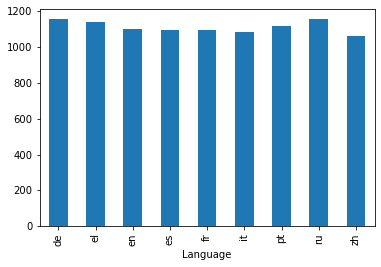

In [46]:
idioma = data.groupby(['Language']).size().plot(kind='bar')

**14. Quais os cartões de cŕedito mais comuns?**<br>


<AxesSubplot:>

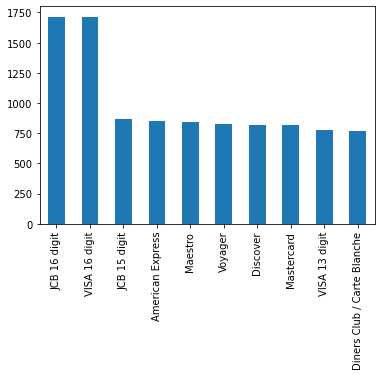

In [50]:
data['CC Provider'].value_counts().plot(kind='bar')